<a href="https://colab.research.google.com/github/ed-chin-git/DS-Sprint-01-Dealing-With-Data/blob/master/DS_Unit_1_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [98]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data 
data_url='http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data'
df=pd.read_csv(data_url, header=None)
print(data_url)
print(' # Observations =', df.shape[0],'\n # Feature =', df.shape[1] )

http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data
 # Observations = 306 
 # Feature = 4


In [99]:
# check for NANs

df.isna().sum()

0    0
1    0
2    0
3    0
dtype: int64

In [0]:
#  Set informative feature names

# Attribute Information:
#   1. Age of patient at time of operation (numerical)
#   2. Patient's year of operation (year - 1900, numerical)
#   3. Number of positive axillary nodes detected (numerical)
#   4. Survival status (class attribute)
#         1 = the patient survived 5 years or longer
#         2 = the patient died within 5 year

df.columns = ['Age', 'Year_of_Oper','Num_Nodes','Survived_5']

#  change Survived_5 encoding from 1 / 2 to 0 / 1
for i in range(0,len(df),1):
  if df['Survived_5'][i] == 1:
    df['Survived_5'][i] = 0
  elif  df['Survived_5'][i] ==2:
    df['Survived_5'][i] = 1

In [101]:
df.head(10)

,Age,Year_of_Oper,Num_Nodes,Survived_5
0,30,64,1,0
1,30,62,3,0
2,30,65,0,0
3,31,59,2,0
4,31,65,4,0
5,33,58,10,0
6,33,60,0,0
7,34,59,0,1
8,34,66,9,1
9,34,58,30,0


## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [102]:
#  Look at Summary Stats
df.describe()

,Age,Year_of_Oper,Num_Nodes,Survived_5
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,0.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,0.000000
25%,44.000000,60.000000,0.000000,0.000000
50%,52.000000,63.000000,1.000000,0.000000
75%,60.750000,65.750000,4.000000,1.000000
max,83.000000,69.000000,52.000000,1.000000


In [104]:
#  Cross Tabulation

# create 5 equal-sized bins of Age
age_bins = pd.cut(df['Age'], 3,precision=0)  
node_bins = pd.cut(df['Num_Nodes'], 5,precision=0)  

# cross tabulate the bins  Show percentages  
pd.crosstab([age_bins,df['Survived_5']],node_bins)  #, normalize='columns')

Num_Nodes                (-0.1, 10.0]  (10.0, 21.0]  (21.0, 31.0]  \
Age          Survived_5                                             
(30.0, 48.0] 0                     72             8             1   
             1                     20             2             3   
(48.0, 65.0] 0                    110             2             4   
             1                     28            12             3   
(65.0, 83.0] 0                     26             1             0   
             1                     10             1             0   

Num_Nodes                (31.0, 42.0]  (42.0, 52.0]  
Age          Survived_5                              
(30.0, 48.0] 0                      0             0  
             1                      0             1  
(48.0, 65.0] 0                      0             1  
             1                      1             0  
(65.0, 83.0] 0                      0             0  
             1                      0             0

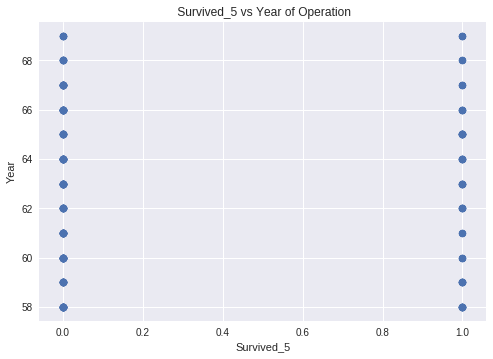

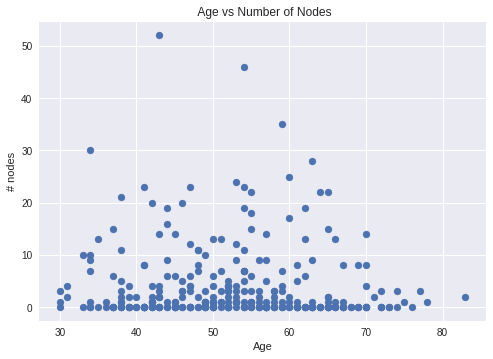

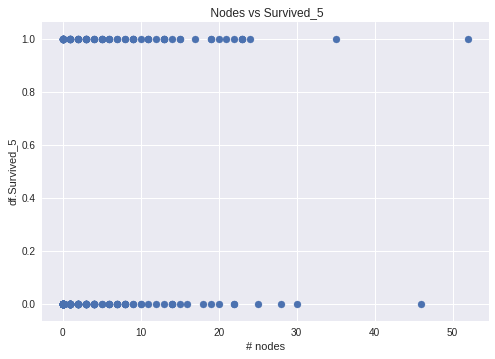

In [108]:
plt.scatter(df.Survived_5,df.Year_of_Oper, marker = 'o')
plt.title(' Survived_5 vs Year of Operation')
plt.xlabel('Survived_5')
plt.ylabel('Year')
plt.show()

plt.scatter(df.Age,df.Num_Nodes, marker = 'o')
plt.title(' Age vs Number of Nodes')
plt.xlabel('Age')
plt.ylabel('# nodes')
plt.show()

plt.scatter(df.Num_Nodes,df.Survived_5, marker = 'o')
plt.title(' Nodes vs Survived_5')
plt.xlabel('# nodes')
plt.ylabel('df.Survived_5')
plt.show()



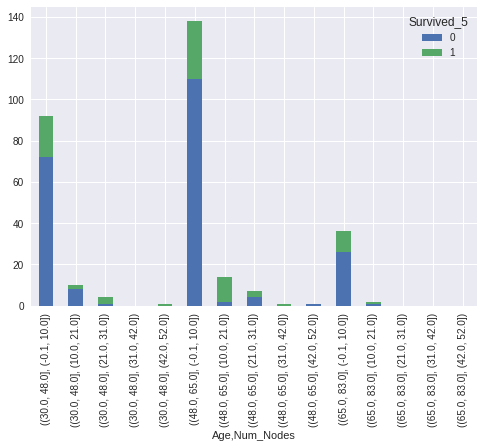

In [110]:
x_tab = pd.crosstab([age_bins,node_bins],df['Survived_5'])  #, normalize='columns')
x_tab.plot(kind='bar', stacked=True);

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive correlation with survival?
          
          Year of Operation seems to have positive corelation.
            As Year increases , Survival Increase
   


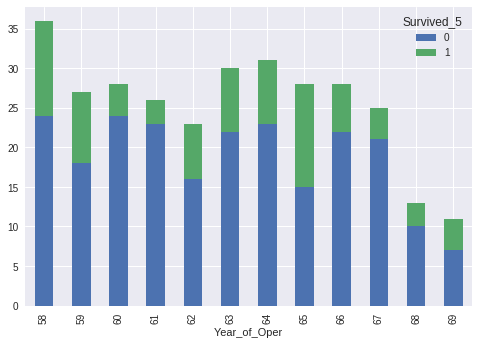

In [112]:
x_tab = pd.crosstab([df['Year_of_Oper']],df['Survived_5'])  #, normalize='columns')
x_tab.plot(kind='bar', stacked=True);

- What is at least one feature that looks to have a negative correlation with survival?
                                                  
          Number of Nodes feature has neg correlation. 
          As num of nodes increase, survival decreases  



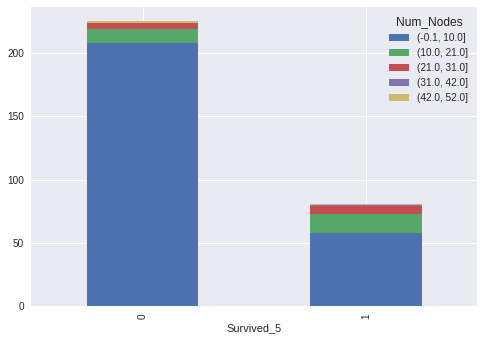

In [122]:
x_tab = pd.crosstab(df['Survived_5'],[node_bins])  #, normalize='columns')
x_tab.plot(kind='bar', stacked=True);

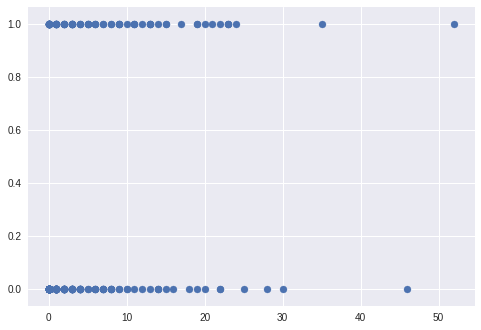

In [120]:
plt.scatter(df['Num_Nodes'],df['Survived_5'])
plt.show()


- How are those two features related with each other, and what might that mean?
                            
                            Number of Nodes and Year of Operation don't seem to be related to each other
                             Number of Nodes having negative correlation is obvious
                             Year Of Operation having positive correltion may be due to better medical procedures

